In [47]:
# Importieren der benötigt Bibliotheken
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 

import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import division
from pandas import DataFrame, Series
from scipy import stats

%matplotlib inline

## Datei kann unter folgender URL runtergeladen werden

In [2]:
url = 'http://www.wahlergebnisse.nrw.de/landtagswahlen/2012/txtdateien/a136lw1200.txt'

## Importieren des Datensatzes aus dem Arbeitsverzeichnis als DataFrame mit richtiger Codierung
##  Bei einem Blick in die Daten ist zur erkennen, dass Missings mit '-' codiert sind

wahlerg = pd.read_csv('../WahlergebisseNRW2012.csv', sep=';', encoding='Latin-1',
                      na_values='-')

In [3]:
## Dimension des Datensatzes anzeigen
wahlerg.shape

(129, 54)

# Wie sieht der Datensatz überhaupt aus
- Die letzten fünf Fälle werden angezeigt

In [4]:
wahlerg.tail()

,Wahlkreisnr.,Wahlkreisname,Wahlberechtigte insgesamt,Wähler/-innen,Ungültige Stimmen Erststimmen,Ungültige Stimmen Zweitstimmen,Gültige Stimmen Erststimmen,Gültige Stimmen Zweitstimmen,CDU Erststimmen,CDU Zweitstimmen,...,BGD Erststimmen,BGD Zweitstimmen,BüSo Erststimmen,BüSo Zweitstimmen,LD Erststimmen,LD Zweitstimmen,RRP Erststimmen,RRP Zweitstimmen,Einzelbewerber / -innen Erststimmen,Einzelbewerber / -innen Zweitstimmen
124,124,Hochsauerlandkreis I,106591,65436,923,844,64513,64592,29034,24284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,125,Hochsauerlandkreis II,100400,61002,1093,1088,59909,59914,28315,23995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,126,Siegen-Wittgenstein I,112772,62405,949,870,61456,61535,21422,16411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,127,Siegen-Wittgenstein II,103721,62665,994,892,61671,61773,22917,18084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,128,Olpe,104327,62592,874,832,61718,61760,30965,26545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Codebook für den Datensatz erstellen

- Informationen über die Variablen zu

    1.Anzahl
    
    2.Struktur
    
    3.Missings
    
    4.Typ

In [5]:
wahlerg.info()
## Okay die Variablen liegen in 24 Gleitkommazahlen, 29 Integer und einer Textvariable vor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 54 columns):
Wahlkreisnr.                            129 non-null int64
Wahlkreisname                           129 non-null object
Wahlberechtigte insgesamt               129 non-null int64
Wähler/-innen                           129 non-null int64
Ungültige Stimmen Erststimmen           129 non-null int64
Ungültige Stimmen Zweitstimmen          129 non-null int64
Gültige Stimmen Erststimmen             129 non-null int64
Gültige Stimmen Zweitstimmen            129 non-null int64
CDU Erststimmen                         129 non-null int64
CDU Zweitstimmen                        129 non-null int64
SPD Erststimmen                         129 non-null int64
SPD Zweitstimmen                        129 non-null int64
GRÜNE Erststimmen                       129 non-null int64
GRÜNE Zweitstimmen                      129 non-null int64
FDP Erststimmen                         129 non-null int64
FDP Zweit

In [6]:
## Anzeigen der erhaltenen Stimmen der Parteien
## Zeile 0 enthält bereits alle notwendigen summen
## Und wird daher bei der Summierung nicht berücksichtigt
wahlerg.ix[1:, 2 : wahlerg.shape[1]-1].sum()

Wahlberechtigte insgesamt              13262049.0
Wähler/-innen                           7901268.0
Ungültige Stimmen Erststimmen            120658.0
Ungültige Stimmen Zweitstimmen           107273.0
Gültige Stimmen Erststimmen             7780610.0
Gültige Stimmen Zweitstimmen            7793995.0
CDU Erststimmen                         2545309.0
CDU Zweitstimmen                        2050321.0
SPD Erststimmen                         3290561.0
SPD Zweitstimmen                        3049983.0
GRÜNE Erststimmen                        723581.0
GRÜNE Zweitstimmen                       884298.0
FDP Erststimmen                          372727.0
FDP Zweitstimmen                         670082.0
DIE LINKE Erststimmen                    201637.0
DIE LINKE Zweitstimmen                   194428.0
PIRATEN Erststimmen                      617926.0
PIRATEN Zweitstimmen                     609176.0
pro NRW Erststimmen                           0.0
pro NRW Zweitstimmen                     118326.0


In [7]:
## Tabellieren der fehlenden Werte in Variable 2 und 3
pd.isnull(wahlerg.ix[:,2]).value_counts()
pd.isnull(wahlerg.ix[:,3]).value_counts()
## In der Variablen liegen keine Missings vor

False    129
Name: Wähler/-innen, dtype: int64

## Um UTF8-Encoding Probleme zu vermeiden 
- Eine Kopie wird in diesem Format abgelegt und abgerufen

In [8]:
## Um später Probleme mit der Kodierung zu vermeiden wird der Datensatz nochmal als
## utf-8 encoding abgespeichert und wiederverwendet
wahlerg.to_csv('../wahlerg.csv', sep=';', header=True, index=False,
              encoding='utf-8')

## Nun kann aus Variable 'Wähler/-innen' und 
## 'Wahlberechtigte Insgesamt' die 'Wahlbeteiligung ermittelt werden

In [9]:
wahlerg = pd.read_csv('../wahlerg.csv', sep=';',   encoding='utf-8')

In [10]:
wahlerg.head()

,Wahlkreisnr.,Wahlkreisname,Wahlberechtigte insgesamt,Wähler/-innen,Ungültige Stimmen Erststimmen,Ungültige Stimmen Zweitstimmen,Gültige Stimmen Erststimmen,Gültige Stimmen Zweitstimmen,CDU Erststimmen,CDU Zweitstimmen,...,BGD Erststimmen,BGD Zweitstimmen,BüSo Erststimmen,BüSo Zweitstimmen,LD Erststimmen,LD Zweitstimmen,RRP Erststimmen,RRP Zweitstimmen,Einzelbewerber / -innen Erststimmen,Einzelbewerber / -innen Zweitstimmen
0,0,Nordrhein-Westfalen,13262049,7901268,120658,107273,7780610,7793995,2545309,2050321,...,83.0,NaN,272.0,NaN,120.0,NaN,418.0,NaN,2605.0,NaN
1,1,Aachen I,86552,55999,693,568,55306,55431,17062,13179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Aachen II,91237,55563,891,788,54672,54775,18672,13644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347.0,NaN
3,3,Aachen III,116350,68241,1475,1372,66766,66869,21667,17864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aachen IV,111694,67326,1248,1257,66078,66069,23274,18690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
len(wahlerg)

129

In [12]:
## By Python startet der Index bei 0, so dass der Index auf 128 endet

In [13]:
## Erzeugen der Variablen "Wahlbeteiligung" 
wahlerg['wahlbet'] = pd.concat([wahlerg.ix[:,3]/wahlerg.ix[:,2]])

## Zusammenfassung der Wahlbeteilung OHNE den ersten Fall des Datensatzes

 1. Die Hälfte der Wahlkreise hatte eine Wahlbeteiligung unter 60%
 2. 3/4 der Wahlkreise hatten eine Wahlbeteiligung von unter 62%
 3. Die Standardabweichung beträgt nur 4%, dass bedeutet dass die Wahlkreise
    bei der Wahlbeteiliung ziemlich nach beianeinder liegen

In [14]:
wahlerg.ix[1:(len(wahlerg)-1),'wahlbet'].describe()

count    128.000000
mean       0.593875
std        0.040993
min        0.454883
25%        0.570618
50%        0.596961
75%        0.618818
max        0.696884
Name: wahlbet, dtype: float64

## Zusammenfassen der Wahlkreise  zu den Städten bzw. Landkreisen mit Regulären Ausdrücken

- Damit wird es möglich die Wahlbeteiligung mittels einer Karte zu visualisieren

In [15]:
wahlerg['WahlkreisKomp'] = wahlerg['Wahlkreisname'].str.replace('\s.*$', '')
## Wie viele Wahlkreise sind in den einzelnen Städten integriert
wahlerg['WahlkreisKomp'].value_counts()
## In Köln liegen die meisten Wahlkreise vor

Köln                    7
Recklinghausen          5
Essen                   4
Aachen                  4
Dortmund                4
Düsseldorf              4
Duisburg                4
Mettmann                4
Rhein-Sieg-Kreis        4
Märkischer              3
Gütersloh               3
Steinfurt               3
Rhein-Erft-Kreis        3
Wuppertal               3
Unna                    3
Wesel                   3
Lippe                   3
Rhein-Kreis             3
Bochum                  3
Bielefeld               2
Siegen-Wittgenstein     2
Hochsauerlandkreis      2
Warendorf               2
Kleve                   2
Coesfeld                2
Heinsberg               2
Viersen                 2
Borken                  2
Oberbergischer          2
Mönchengladbach         2
Krefeld                 2
Soest                   2
Rheinisch-Bergischer    2
Bonn                    2
Oberhausen              2
Düren                   2
Hagen                   2
Ennepe-Ruhr-Kreis       2
Münster     

In [16]:
## Wie sieht die verdichtete Wahlbeteiligung der Städte aus
## Die Daten werden dafür nach Städten gruppiert

wahlbetStadt = wahlerg['wahlbet'].groupby(wahlerg['WahlkreisKomp'])

In [17]:
## Ermitteln der Wahlbeteiligung durch
wahlbetStadt = wahlbetStadt.mean()
wahlbetStadt = wahlbetStadt.reset_index()
## Festzuhalten ist dass die Wahlbeteiligung nirgendwo unter 50 % liegt

In [18]:
## Merge der beiden Datensätze bei dem allex X beibehalten werden
wahlerg = pd.merge(wahlerg, wahlbetStadt, on='WahlkreisKomp', how='left', suffixes=('_x', '_y'))

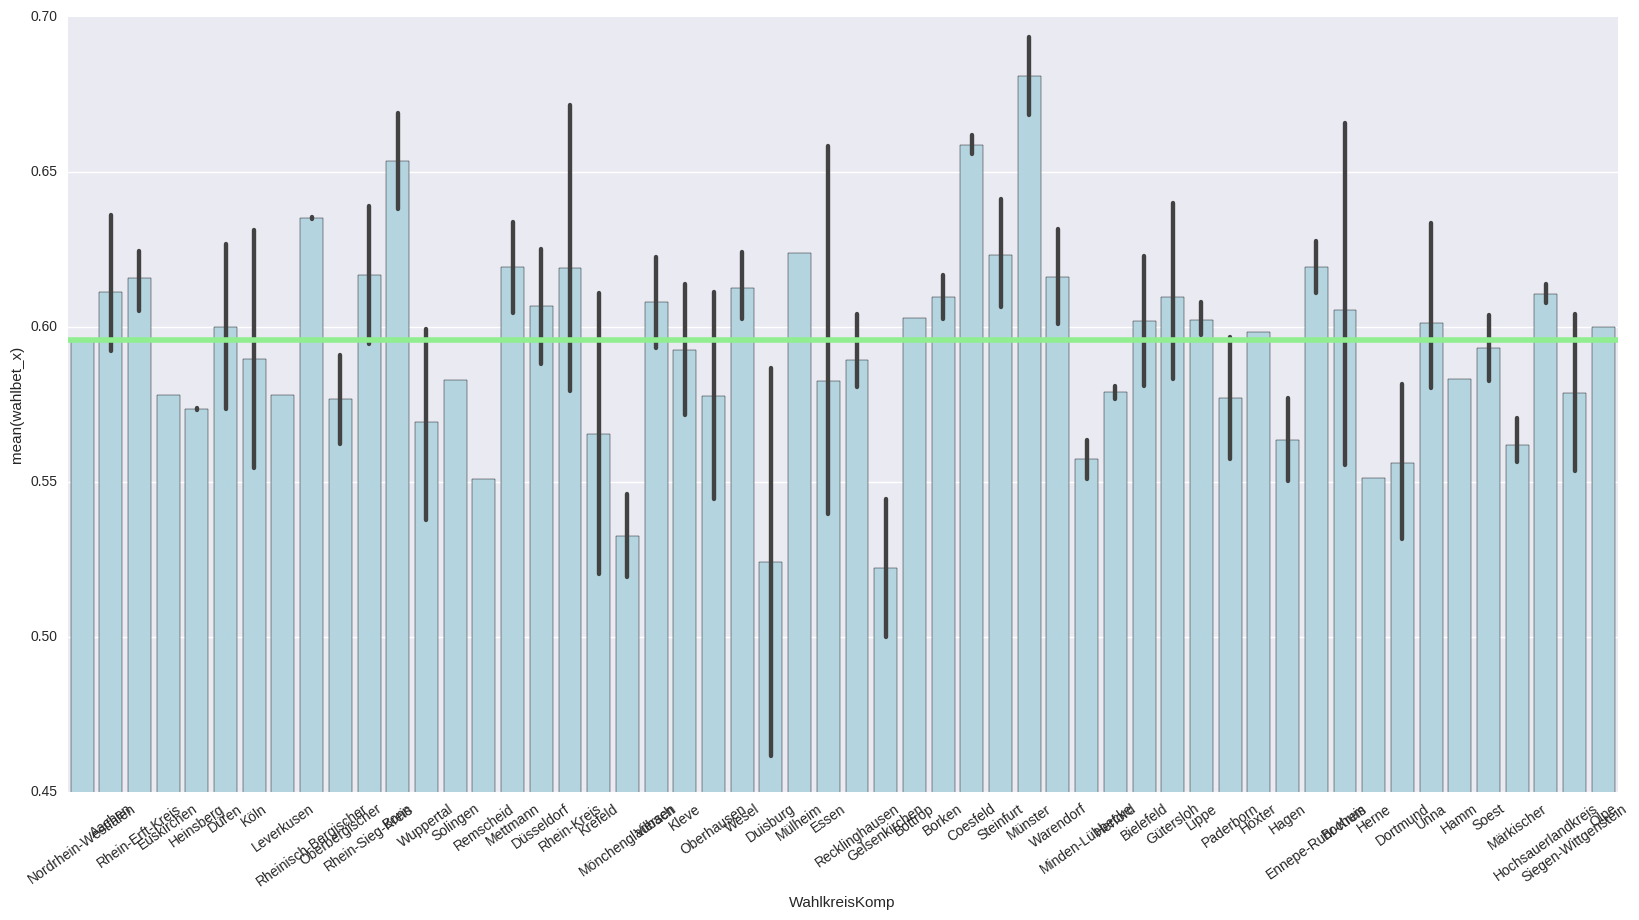

In [19]:
## Okay das scheint ein wenig unübersichtlich zu sein
## Deshalb wird das Ergebnis in einem Balkendiagramm dargestellt
plt.figure(figsize=(20, 10))
sns.barplot(x='WahlkreisKomp', y='wahlbet_x', data=wahlerg, color='lightblue')
plt.xticks(rotation=35)
plt.ylim(.45,.7)

## durchschnitt als Linie
## NRW wert liegt bereits als Variable vor
plt.axhline(y=wahlerg.ix[0, 'wahlbet_x'], linewidth=4, color='lightgreen')

- Die Daten deuten darauf hin, dass in wirtschaftlich starken Regionen die Wahlbeteiligung in   der Regel höher ausfällt
- Eine Karte von NRW mit der jeweiligen Beteilung könnte das verdeutlichen

In [20]:
## import des Kartenmoduls
import folium
from folium import plugins

In [21]:
## Nun muss eine NRW-Karte mit den Landkreisen geladen werden
## Das shapefile ist hier zu finden:
urlKarte = 'http://www.geodatenzentrum.de/geodaten/gdz_download.gdz_down_load?prod_id=61&gdz_spr=deu&gdz_html=0&gdz_user_id=01&gdz_para=gdz_message'

In [22]:
## Die Koordinaten in Längen- und Breitengraden von NRW sind u.a. hier zu finden
urlNRWCoord =  [51.45, 7.3]

# Plotten der Karte

- Der Rahmen für die Karte muss zuerst definiert werden
- Die Karte muss darauf im lokalen Verzeichniss abgespeichert werden
- Danach wird die Karte als Markdown abgerufen

In [23]:
map_nrw = folium.Map(location=urlNRWCoord, zoom_start=8)
map_nrw.save('osm.html')

![text](./nrw_osm.png)

In [24]:
## Die Verwaltungsgrenzen als .geojson kann unter folgendem Link runtergeladen werden:
urlGeojson = 'http://opendatalab.de/projects/geojson-utilities/'
## nach dem runterladen kann die datei eingelesen werden
verwaltung_geojson =  r'../landkreise_simplify200.geojson'
## jetzt müssen die Verwaltunggrenzen mit dem .geojson file gemacht werden

In [25]:
## Es scheint wie so oft bei Latin-1 codierung und UTF8 kompabiltätsprobleme zu geben,
## daher funktioniert das Replacement mit Regex nicht
wahlbetStadt['WahlkreisKomp'] = wahlbetStadt['WahlkreisKomp'].str.replace('Märkischer', 'Märkischer Kreis')
## Die Variable muss mittels des indexwerts Verändert werden

In [26]:
wahlbetStadt.ix[[9,10,15,22,25,29,30,31,32,33,35,] , 'WahlkreisKomp']  = ['Düren','Düsseldorf','Gütersloh', 'Höxter','Köln',
                                                                      'Minden-Lübbecke', 'Märkischer Kreis',
                                                                      'Mönchengladbach', 'Mülheim', 'Münster',
                                                                      'Oberbergischer Kreis'  ]
## Entfernen von NRW als Landkreis
wahlbetStadt = wahlbetStadt[wahlbetStadt.WahlkreisKomp != 'Nordrhein-Westfalen']
#wahlbetStadt = wahlbetStadt[wahlbetStadt.WahlkreisKomp != 'M\xe4rkischer Kreis']
#wahlbetStadt.drop(wahlbetStadt.index[30], inplace=True)
wahlbetStadt.reset_index()

,index,WahlkreisKomp,wahlbet
0,0,Aachen,0.611320
1,1,Bielefeld,0.602010
2,2,Bochum,0.605406
3,3,Bonn,0.653464
4,4,Borken,0.609564
5,5,Bottrop,0.602820
6,6,Coesfeld,0.658764
7,7,Dortmund,0.556100
8,8,Duisburg,0.524119
9,9,Düren,0.599983


In [27]:
## Einige Namen sind unvollständig
wahlbetStadt.ix[:,'WahlkreisKomp'] = wahlbetStadt['WahlkreisKomp'].str.replace('Rheinisch-Bergischer', 'Rheinisch-Bergischer Kreis')
wahlbetStadt.ix[:,'WahlkreisKomp'] = wahlbetStadt['WahlkreisKomp'].str.replace('Rhein-Kreis', 'Rhein-Kreis Neuss')

- Okay wie so oft mit deutschen und internationalen Datensätzen befinden wir uns in der
  unicode Hölle. 
- Hierbei ist es möglicherweise sinnvoller die Daten mit numerischen
  Werten zu matchen. Die ersten Fünf Ziffern des allgemeinen Gemeindeschlüssels (AGS) stehen   für den Landkreis. 
- Damit werd der Datenjoin definitiv funktionieren

In [28]:
## Dafür kann der AGS des Zensus 2011 vernwendet werden
## Der link hierfür befindet sich hier:
urlAGS1 ='https://www.destatis.de/DE/ZahlenFakten/LaenderRegionen/Regionales/Gemeindeverzeichnis/Administrativ/Archiv/GVAuszugJ/31122014_Auszug_GV.xls?__blob=publicationFile'
## oder direkt in der .dbf Datei des Bundesamts für Kartographie:
urlAGS2 = 'http://www.geodatenzentrum.de/geodaten/gdz_rahmen.gdz_div?gdz_spr=deu&gdz_akt_zeile=5&gdz_anz_zeile=1&gdz_unt_zeile=19&gdz_user_id=0'

In [29]:
## Die .dbf kann als normale textdatei eingelesen werden
ags = pd.read_csv('../vg2500_geo84/vg2500_krs.csv', sep=';', encoding='Latin-1')

In [30]:
ags[50:70]

,"USE,N,6,0",RS,RS_Alt,GEN,"SHAPE_LENG,N,31,15","SHAPE_AREA,N,31,15"
50,4,3451,34510000000,Ammerland,130685.978487,7.268242e+08
51,4,3452,34520000000,Aurich,299324.293277,1.304511e+09
52,4,3453,34530000000,Cloppenburg,196018.547503,1.411813e+09
53,4,3454,34540000000,Emsland,271600.406509,2.876641e+09
54,4,3455,34550000000,Friesland,169957.774729,6.158714e+08
55,4,3456,34560000000,Grafschaft Bentheim,177143.259464,9.829927e+08
56,4,3457,34570000000,Leer,182982.254741,1.064003e+09
57,4,3458,34580000000,Oldenburg,162841.374381,1.044519e+09
58,4,3459,34590000000,Osnabr?ck,317921.769620,2.109330e+09
59,4,3460,34600000000,Vechta,151022.364045,8.143177e+08


## Alle mit 5 codierten fälle  der zweiten Variablen scheinen zu NRW zu gehören.  Der datensatz wird dementsprechend getrimmt

In [31]:
ags = ags[(ags.RS >= 5000) & (ags.RS < 6000)]

In [32]:
ags.head()
## Die letzen beiden und die erste Variabel im Datensatz werden nicht benötigt

,"USE,N,6,0",RS,RS_Alt,GEN,"SHAPE_LENG,N,31,15","SHAPE_AREA,N,31,15"
64,4,5111,51110000000,D?sseldorf,91421.830277,2.197647e+08
65,4,5112,51120000000,Duisburg,76480.458049,2.358640e+08
66,4,5113,51130000000,Essen,66677.380105,2.077783e+08
67,4,5114,51140000000,Krefeld,52206.121568,1.344112e+08
68,4,5116,51160000000,M?nchengladbach,68019.285832,1.669145e+08


In [33]:
ags.shape

(53, 6)

In [34]:
ags = ags.ix[:, 1:4]

- Okay nun müssten die Datensätze die gleiche Anzahl an Kreisen enthalten
- Ein logischer vergleich der Länge bietet sich an

In [35]:
len(ags) == len(wahlbetStadt)

True

In [36]:
ags.ix[[80, 83,64,99,101,69,68,92,112,103], 'GEN'] = ['Köln', 'Düren', 'Düsseldorf', 'Gütersloh','Höxter',
                                          'Mülheim', 'Mönchengladbach', 'Münster','Märkischer Kreis',
                                          'Minden-Lübbecke']


In [37]:
ags['GEN2'] = ags['GEN'].str.replace('[ÄäÜüÖöß]', '')

In [38]:
## Datensatz nach Namen aufsteigende sortieren
ags.sort_values('GEN2', axis=0, inplace=True)

In [39]:
wahlbetStadt.loc[:,'WahlkreisKomp2'] = wahlbetStadt['WahlkreisKomp'].str.replace('[ÄäÜüÖöß]', '')

In [40]:
wahlbetStadt = wahlbetStadt.sort_values('WahlkreisKomp2', axis=0)

In [41]:
wahlags = pd.merge(wahlbetStadt, ags, left_on='WahlkreisKomp2', right_on='GEN2', how='outer')

## Nun müssten beide Datensätze und die AGS matchen so kann der Join mit dem .json-File erfolgen

In [42]:
## Beide Datensätze stimmen überein
wahlags[0:20]

,WahlkreisKomp,wahlbet,WahlkreisKomp2,RS,RS_Alt,GEN,GEN2
0,Aachen,0.611320,Aachen,5334,53340000000,Aachen,Aachen
1,Bielefeld,0.602010,Bielefeld,5711,57110000000,Bielefeld,Bielefeld
2,Bochum,0.605406,Bochum,5911,59110000000,Bochum,Bochum
3,Bonn,0.653464,Bonn,5314,53140000000,Bonn,Bonn
4,Borken,0.609564,Borken,5554,55540000000,Borken,Borken
5,Bottrop,0.602820,Bottrop,5512,55120000000,Bottrop,Bottrop
6,Coesfeld,0.658764,Coesfeld,5558,55580000000,Coesfeld,Coesfeld
7,Dortmund,0.556100,Dortmund,5913,59130000000,Dortmund,Dortmund
8,Düren,0.599983,Dren,5358,53580000000,Düren,Dren
9,Düsseldorf,0.606614,Dsseldorf,5111,51110000000,Düsseldorf,Dsseldorf


In [43]:
## Okay nun sieht der Datensatz richtig aus
## Zur Variable 'RS' muss nun eine 0 hinzugefügt werden damit Sie mit dem .geojson File übereinstimmt
wahlags.loc[:, 'RS0'] = '0' 
wahlags.loc[:, 'RS_t'] = wahlags['RS'].apply(str)

In [44]:
# Pasten der beiden Variablen
wahlags.loc[:, 'RS_string'] = wahlags['RS0'].map(str) + wahlags['RS_t']

In [45]:
wahlags.loc[:, 'WahlbetPro'] = wahlags['wahlbet']*100

In [46]:
## Der Code aus Zeile 33 wird jetzt nochmal ausprobiert
karte = folium.Map(location=urlNRWCoord, zoom_start=7.5)
karte.choropleth(geo_path=verwaltung_geojson, data=wahlags,
             columns=['RS_string', 'WahlbetPro'],
             fill_color='BuPu',
             threshold_scale=[50, 55, 60, 62.5, 65,70],
             fill_opacity=0.7, line_opacity=0.5,
             key_on='feature.properties.AGS',
             reset=True,
             legend_name='Wahlbeteiligung 2012 in %')                
karte.save('NRWArbeit.html')
karte

- Okay so wie es Aussieht sieht ist in wirtschafltich schwachen
  Regionen wie im Ruhrgebiet die Wahlbeteiligung nicht stark
- Eine Prüfung des Zusammenhangs zwischen Arbeitslosenquote und Wahlbeteiligung würde Sinn   machen

![text](./nrw_wahl2012.png)